In [16]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib as plt
import requests
from urllib.parse import quote
import json
import pyproj
import os
os.chdir("D:/Projects/crime-prediction")

import common.census_tract as tract

pyproj.datadir.set_data_dir("D:/ProgramData/anaconda3/envs/crime-prediction/Library/share/proj")

In [17]:
census_tracts_path='data/census_tracts.geojson'

In [19]:
def parse_census_tracts_data():
    gdf = gpd.read_file(census_tracts_path).rename(columns={'NAMELSAD': 'Tract Name'})
    gdf = gdf[['Tract Name', 'geometry']]
    group_gdf = gdf.copy()
    group_gdf['Tract Name'] =  gdf.apply(lambda row: tract.formatTractGroupName(row["Tract Name"]) , axis=1)
    group_gdf = group_gdf.dissolve(by='Tract Name').reset_index()
    gdf = pd.concat([gdf, group_gdf]).drop_duplicates(subset=["Tract Name"]).reset_index(drop=True)
    return gdf

In [20]:
tracts_gdf=parse_census_tracts_data()
tracts_gdf.to_file('data/preprocessed/census_tracts_data.geojson', driver="GeoJSON")

<Axes: >

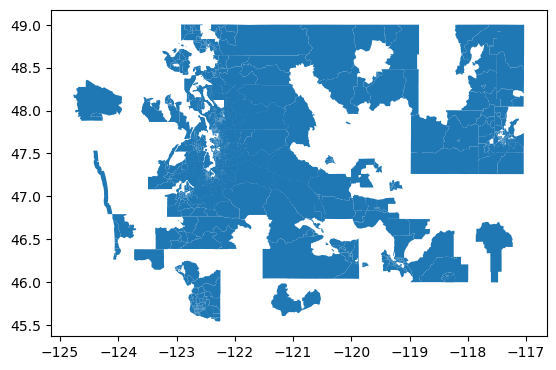

In [21]:
tracts_gdf.plot()